# Analize the dataset https://www.kaggle.com/fmena14/volcanoesvenus and predict if the image of Venus surface has a Volcano
# Using the tools: 
## `DecisionTreeClassifier`, `GaussianNB` and `RandomForestClassifier`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Exploratory Analysis

In [2]:
df_train = pd.read_csv("Volcanoes_train/train_images.csv",header=None)
df_test = pd.read_csv("Volcanoes_test/test_images.csv",header=None)
print("Shapes training: ",df_train.shape)
print("Shapes test: ",df_test.shape)
df_train.head()

Shapes training:  (7000, 12100)
Shapes test:  (2734, 12100)


,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [3]:
train_labels = pd.read_csv("Volcanoes_train/train_labels.csv")
test_labels = pd.read_csv("Volcanoes_test/test_labels.csv")
print("Shapes labels training: ", train_labels.shape)
print("Shapes labels test: ", test_labels.shape)
train_labels.head()

Shapes labels training:  (7000, 4)
Shapes labels test:  (2734, 4)


,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


### To see the images of Venus

In [57]:
train_reshape = df_train.values.reshape((df_train.shape[0],1,110,110)) #to recover matrix form
train_reshape_graunded_to_rgb = train_reshape/255.0
train_reshape_graunded_to_rgb_transpose = train_reshape_graunded_to_rgb.transpose([0, 2, 3, 1])

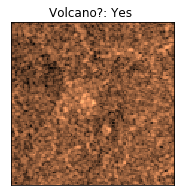

Volcano?             1.00
Type                 3.00
Radius              17.46
Number Volcanoes     1.00
Name: 0, dtype: float64


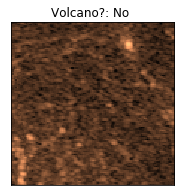

Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 20, dtype: float64


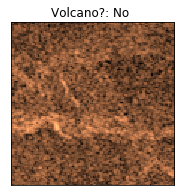

Volcano?            0.0
Type                NaN
Radius              NaN
Number Volcanoes    NaN
Name: 6500, dtype: float64


(None, None, None)

In [72]:
label_names = ["No","Yes"]
def visualize(X,Y):
    aux = train_reshape_graunded_to_rgb_transpose[X]
    
    f,ax = plt.subplots(1,figsize=(8,3))
    ax.set_title("Volcano?: %s "%(label_names[Y["Volcano?"][X]]))

    ax.imshow(aux[:,:,0],cmap='copper')
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()
    print(Y.loc[X,:])
    
visualize(0,train_labels), visualize(20,train_labels), visualize(6500,train_labels)

## Let's get just the first column from the labels

In [4]:
y_train_label = train_labels[['Volcano?']].copy()
y_test_label = test_labels[['Volcano?']].copy()

In [5]:
y_train_label.head()

,Volcano?
0,1
1,0
2,0
3,0
4,0


## Try to predict using the Decision Tree

In [9]:
volcanoesVenus_classifier = DecisionTreeClassifier(max_leaf_nodes=70, random_state=0)
volcanoesVenus_classifier.fit(df_train, y_train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=70,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
predictionsVolcanoes = volcanoesVenus_classifier.predict(df_test)

In [11]:
predictionsVolcanoes[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
y_test_label['Volcano?'][:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: Volcano?, dtype: int64

In [13]:
accuracy_score(y_true = y_test_label, y_pred = predictionsVolcanoes)


0.9008778346744697

## Try to predict using the Gaussian NB

In [14]:
gnb = GaussianNB()

model = gnb.fit(df_train, y_train_label.values.ravel())


In [15]:
preds = gnb.predict(df_test)
accuracy_score(y_test_label, preds)

0.3357717629846379

## Try to predict using the Random Forest

In [16]:
volcanoesVenus_RandForest = RandomForestClassifier(max_depth=2, random_state=0)
volcanoesVenus_RandForest.fit(df_train, y_train_label.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
predictionsVolcanoesRandomFor = volcanoesVenus_RandForest.predict(df_test)

In [18]:
accuracy_score(y_test_label, predictionsVolcanoesRandomFor)

0.8427212874908558